# Data Preparation

In [1]:
import pandas as pd

#Read in the two files
arn_rf_groups = pd.read_csv("../data/rf_output_TSCA2b.csv").set_index("Unnamed: 0")
epa_groups = pd.read_csv("../outputs/TSCA_categories.csv").set_index("Unnamed: 0")

In [2]:
# Align column names
epa_groups = epa_groups.rename(columns={'chemicals':'dtxsid'})

In [3]:
# Remove unecessary columns
all_groups = arn_rf_groups.merge(epa_groups, on = 'dtxsid', how = 'inner')
all_groups = all_groups.drop(columns=['PREFERRED_NAME', 
 'errors', 
 'qsar_ready_smiles', 
 'physical_form',  
 'final_centroid',
 'final_dist',
 'lt65_picks',
 'gt65_picks',
 'MaxMin_selection_picks',
 'diverse_picks',
 'category_size',
 'final_picks',
 'screenable',
 'screenable_centroid',
 'screenable_centroid_id',
 'screening_analogues',
 'screening_dist',
 'tested.count',
 'phospho.substruct',
 'silico.substruct',
 'elements',
 'elements_permitted',
 'silicon_containing',
 'MolWeight',
 'nbLipinskiFailures',
 'LogP_pred',
 'LogP_predRange',
 'AD_LogP',
 'AD_index_LogP',
 'Conf_index_LogP',
 'MP_pred',
 'MP_predRange',
 'AD_MP',
 'AD_index_MP',
 'Conf_index_MP',
 'BP_pred',
 'BP_predRange',
 'AD_BP',
 'AD_index_BP',
 'Conf_index_BP',
 'LogVP_pred',
 'VP_predRange',
 'AD_VP',
 'AD_index_VP',
 'Conf_index_VP',
 'LogWS_pred',
 'WS_predRange',
 'AD_WS',
 'AD_index_WS',
 'Conf_index_WS',
 'LogHL_pred',
 'HL_predRange',
 'AD_HL',
 'AD_index_HL',
 'Conf_index_HL',
 'RT_pred',
 'AD_RT',
 'AD_index_RT',
 'Conf_index_RT',
 'RT_predRange',
 'LogKOA_pred',
 'KOA_predRange',
 'AD_KOA',
 'AD_index_KOA',
 'Conf_index_KOA',
 'ionization',
 'pKa_a_pred',
 'pKa_a_predRange',
 'pKa_b_pred',
 'pKa_b_predRange',
 'AD_pKa',
 'AD_index_pKa',
 'Conf_index_pKa',
 'LogD55_pred',
 'LogD55_predRange',
 'LogD74_pred',
 'LogD74_predRange',
 'AD_LogD',
 'AD_index_LogD',
 'Conf_index_LogD',
 'HLC',
 'WS_pred_mol/L',
 'WS_pred_mg/L',
 'vendor_count',
 'in_sigma_aldrich',
 'mol'])
all_groups.head()

,dtxsid,CASRN,smiles,NCC,ClassyFire,group,predicted group 1,predicted group 2,predicted group 3,predicted group 1 probability,...,Imides (Chronic toxicity),Organotins (Chronic toxicity),Phenols (Chronic toxicity),Phosphinate Esters (Chronic toxicity),Polynitroaromatics (Chronic toxicity),Substituted Triazines (Chronic toxicity),Thiols (Chronic toxicity),Vinyl Esters (Chronic toxicity),Diazoniums (Chronic toxicity),Ethylene Glycol Ethers
0,DTXSID4063036,3452-09-3,CCCCCCCC#C,"('Neutral Organics',)",Acetylides,"('Acetylides', nan)",Aliphatic nitriles,"Organic phosphonic acids, salts and esters",Simple Lithium compounds,0.429444,...,0,0,0,0,0,0,0,0,0,0
1,DTXSID30870753,693-02-7,CCCCC#C,"('Neutral Organics',)",Acetylides,"('Acetylides', nan)",Aliphatic nitriles,Simple Lithium compounds,"Organic phosphonic acids, salts and esters",0.356111,...,0,0,0,0,0,0,0,0,0,0
2,DTXSID7062374,2396-65-8,C#CCCCCCC#C,"('Neutral Organics',)",Acetylides,"('Acetylides', nan)",Aliphatic nitriles,primary aliphatic diamines and their salts,Simple Lithium compounds,0.403889,...,0,0,0,0,0,0,0,0,0,0
3,DTXSID9061097,765-13-9,CCCCCCCCCCCCCC#C,"('Neutral Organics',)",Acetylides,"('Acetylides', nan)",Aliphatic nitriles,"Organic phosphonic acids, salts and esters",Simple Lithium compounds,0.429444,...,0,0,0,0,0,0,0,0,0,0
4,DTXSID1061233,871-84-1,C#CCCCCC#C,"('Neutral Organics',)",Acetylides,"('Acetylides', nan)",Aliphatic nitriles,Simple Lithium compounds,primary aliphatic diamines and their salts,0.400556,...,0,0,0,0,0,0,0,0,0,0


In [4]:
all_groups['epa_list'] = ''
for i,x in all_groups.iterrows():
    epa_slice = x[-65:]
    cats = epa_slice.keys()
    epa_list = []
    for key in cats:
        if all_groups.loc[i,key] == True:
            epa_list.append(key)
    all_groups.loc[i,'epa_list'] = str(epa_list)

In [5]:
counter = 0
for word_list in all_groups['epa_list']:
    if len(word_list.split(','))>1:
        counter += 1
counter

2440

In [6]:
ncc_list = all_groups['NCC']
new_ncc_list = []
for i in ncc_list:
    if type(i) == float:
        new_ncc_list.append("[]")
    else:
        words = i.split(',')
        first_word = words[0][2:-1]
        new_list = [first_word]
        if len(words) > 2:
            last_word = words[-1][1:-3]
            if len(words) > 3:
                for k in words[1:-1]:
                    new_list.append(k[1:-1])
        new_ncc_list.append(str(new_list))
new_ncc_list[10:20]


["['Neutral Organics']",
 "['Neutral Organics']",
 "['Neutral Organics']",
 '[]',
 "['Neutral Organics']",
 "['Neutral Organics']",
 "['Neutral Organics']",
 "['Neutral Organics']",
 "['Neutral Organics']",
 "['Neutral Organics']"]

In [7]:
#Take a quick look at how the new NCC code has changed predictions over time
all_groups['NCC_EPA_match'] = [all_groups['epa_list'][i] == new_ncc_list[i] for i in range(len(all_groups))]

In [8]:
#This is the number of chemicals with new categories since updating the EPA NCC code and fixing categories
len(all_groups) - all_groups['NCC_EPA_match'].sum()

np.int64(3061)

In [9]:
# These are the changed chemicals. Note that many already were in categories but now have additional categories.
all_groups.loc[all_groups['NCC_EPA_match'] == False]

,dtxsid,CASRN,smiles,NCC,ClassyFire,group,predicted group 1,predicted group 2,predicted group 3,predicted group 1 probability,...,Phenols (Chronic toxicity),Phosphinate Esters (Chronic toxicity),Polynitroaromatics (Chronic toxicity),Substituted Triazines (Chronic toxicity),Thiols (Chronic toxicity),Vinyl Esters (Chronic toxicity),Diazoniums (Chronic toxicity),Ethylene Glycol Ethers,epa_list,NCC_EPA_match
59,DTXSID1062621,2744-50-5,CC(C)COC(=O)C1=CC=C2C3=CC=CC4=C(C=CC(C5=CC=CC1...,"('Esters (Chronic toxicity)',)",Anthracenes,"('Anthracenes', 1.0)",Ortho-phthalates,"Isophthalates, Terephthalates and Trimellitates",Benzoates,0.365889,...,0,0,0,0,0,0,0,0,"['Neutral Organics', 'Esters (Chronic toxicity)']",False
86,DTXSID6066579,20241-77-4,NC1=C2C(=O)C3=C(C(O)=CC=C3NC3=CC=CC=C3)C(=O)C2...,"('Anilines (Acute toxicity)', 'Phenols (Acute ...",Anthracenes,"('Anthracenes', 3.0)",miscellaneous chemistry,aralkylamines,Unsubstituted and linear aliphatic-substituted...,0.222778,...,0,0,0,0,0,0,0,0,"['Anilines (Acute toxicity)', 'Phenols (Acute ...",False
114,DTXSID2025210,17418-58-5,NC1=C2C(=O)C3=C(C=CC=C3)C(=O)C2=C(O)C=C1OC1=CC...,"('Anilines (Acute toxicity)', 'Phenols (Acute ...",Anthracenes,"('Anthracenes', 5.0)",miscellaneous chemistry,aralkylamines,Unsubstituted and linear aliphatic-substituted...,0.228333,...,0,0,0,0,0,0,0,0,"['Anilines (Acute toxicity)', 'Phenols (Acute ...",False
115,DTXSID40888142,72363-26-9,CCOCCCNS(=O)(=O)C1=CC=C(OC2=C(N)C3=C(C(O)=C2)C...,"('Anilines (Acute toxicity)', 'Phenols (Acute ...",Anthracenes,"('Anthracenes', 5.0)",miscellaneous chemistry,aralkylamines,thioxanthenones,0.406111,...,0,0,0,0,0,0,0,0,"['Anilines (Acute toxicity)', 'Phenols (Acute ...",False
116,DTXSID7068926,54243-60-6,COC1=CC=C(OC2=CC(O)=C3C(=O)C4=C(C=CC=C4)C(=O)C...,"('Anilines (Acute toxicity)', 'Phenols (Acute ...",Anthracenes,"('Anthracenes', 5.0)",miscellaneous chemistry,aromatic ethers,Unsubstituted and linear aliphatic-substituted...,0.265111,...,0,0,0,0,0,0,0,0,"['Anilines (Acute toxicity)', 'Phenols (Acute ...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14170,DTXSID0027981,33509-43-2,CC(C)(C)C1=NNC(=S)N(N)C1=O,NaN,Triazines,"('Triazines', nan)",Dihydropurinedione derivatives,miscellaneous chemistry,Unsubstituted and linear aliphatic-substituted...,0.156667,...,0,0,0,0,0,0,0,0,['Substituted Triazines (Acute toxicity)'],False
14172,DTXSID4026262,2451-62-9,O=C1N(CC2CO2)C(=O)N(CC2CO2)C(=O)N1CC1CO1,"('Epoxides', 'Substituted Triazines (Acute tox...",Triazines,"('Triazines', nan)",Glycidyl ethers and esters,Phthalic anhydrides and hydrogenated phthalic ...,"1,2-ethanediols and their carbonates",0.252667,...,0,0,0,0,0,0,0,0,"['Epoxides', 'Substituted Triazines (Acute tox...",False
14174,DTXSID2060042,461-89-2,O=C1NN=CC(=O)N1,NaN,Triazines,"('Triazines', nan)",miscellaneous chemistry,Unsubstituted and linear aliphatic-substituted...,Dihydropurinedione derivatives,0.260444,...,0,0,0,0,0,0,0,0,['Substituted Triazines (Acute toxicity)'],False
14177,DTXSID90885363,26603-40-7,O=C=NCC1=CC(=CC=C1)N1C(=O)N(C2=CC=CC(CN=C=O)=C...,"('Diisocyanates', 'Substituted Triazines (Acut...",Triazines,"('Triazines', nan)",Unsubstituted and linear aliphatic-substituted...,Aromatic nitriles,miscellaneous chemistry,0.136222,...,0,0,0,0,0,0,0,0,"['Substituted Triazines (Acute toxicity)', 'Di...",False


# Initial Coverage Analysis

In [10]:
# Counting the chemicals sorted by neither method
no_domain_no_ncc = []
for i in range(len(all_groups)):
    x = False
    y = False
    if all_groups['in domain'][i] == False:
        x = True
    if all_groups['epa_list'][i] == '[]':
        y = True
    if x and y:
        no_domain_no_ncc.append(i)
all_groups.loc[no_domain_no_ncc].head()

,dtxsid,CASRN,smiles,NCC,ClassyFire,group,predicted group 1,predicted group 2,predicted group 3,predicted group 1 probability,...,Phenols (Chronic toxicity),Phosphinate Esters (Chronic toxicity),Polynitroaromatics (Chronic toxicity),Substituted Triazines (Chronic toxicity),Thiols (Chronic toxicity),Vinyl Esters (Chronic toxicity),Diazoniums (Chronic toxicity),Ethylene Glycol Ethers,epa_list,NCC_EPA_match
13,DTXSID30862951,2450-71-7,NCC#C,NaN,Acetylides,"('Acetylides', nan)",primary aliphatic diamines and their salts,Aliphatic nitriles,Molybdenum and its simple compounds,0.450333,...,0,0,0,0,0,0,0,0,[],True
22,DTXSID5021883,107-19-7,OCC#C,NaN,Acetylides,"('Acetylides', nan)","1,2-ethanediols and their carbonates",Aliphatic nitriles,"Brominated cycloalkanes, alcohols, phosphates,...",0.217000,...,0,0,0,0,0,0,0,0,[],True
27,DTXSID1062752,2978-58-7,CC(C)(N)C#C,NaN,Acetylides,"('Acetylides', nan)",Aliphatic nitriles,Molybdenum and its simple compounds,Polyol amines,0.192222,...,0,0,0,0,0,0,0,0,[],True
33,DTXSID60883396,485-71-2,[H][C@]1(C[C@@H]2CC[N@]1C[C@@H]2C=C)[C@H](O)C1...,NaN,Alkaloids and derivatives,"('Alkaloids and derivatives', nan)",miscellaneous chemistry,imidazoles,hydrocarbyl siloxanes,0.185667,...,0,0,0,0,0,0,0,0,[],True
35,DTXSID6045082,118-10-5,[H][C@@]1(C[C@@H]2CC[N@]1C[C@@H]2C=C)[C@@H](O)...,NaN,Alkaloids and derivatives,"('Alkaloids and derivatives', nan)",miscellaneous chemistry,imidazoles,hydrocarbyl siloxanes,0.185667,...,0,0,0,0,0,0,0,0,[],True


In [11]:
len(no_domain_no_ncc)

2642

In [12]:
# How many chemicals are sorted by NCC?  ARN?
len(all_groups.loc[all_groups['epa_list']!='[]']), len(all_groups.loc[all_groups['in domain']==True])

(7770, 9435)

In [13]:
# Counting ARN but not NCC
in_domain_only = all_groups.loc[all_groups['in domain']==True]

In [14]:
len(in_domain_only.loc[in_domain_only['epa_list']=='[]'])

3806

In [15]:
# Counting ARN miscellaneous
len(in_domain_only.loc[all_groups['predicted group 1']=='miscellaneous chemistry'])

1339

In [16]:
# Of ARN miscellaneous, how many are also not categorized by NCC?
len(in_domain_only.loc[all_groups['predicted group 1']=='miscellaneous chemistry'].loc[all_groups['epa_list']=='[]'])

642

In [17]:
# A quick look at chemicals categorized by NCC but sorted to miscellaneous by ARN
misc_plus_ncc = in_domain_only.loc[all_groups['predicted group 1']=='miscellaneous chemistry'].loc[all_groups['epa_list'] !='[]']
print(len(misc_plus_ncc))
misc_plus_ncc[['epa_list', 'predicted group 1']].groupby('epa_list').count()

697


,predicted group 1
epa_list,
"['Acrylamides', 'Cationic (quaternary ammonium) surfactants']",1
['Acrylamides'],5
"['Acrylates/Methacrylates (Acute toxicity)', 'Benzotriazoles (Acute toxicity)', 'Benzotriazole-hindered phenols', 'Esters (Acute toxicity)', 'Phenols (Acute toxicity)']",1
"['Acrylates/Methacrylates (Acute toxicity)', 'Esters (Acute toxicity)', 'Neutral Organics', 'Phenols (Acute toxicity)']",1
"['Acrylates/Methacrylates (Acute toxicity)', 'Esters (Acute toxicity)', 'Neutral Organics']",9
...,...
['Polynitroaromatics (Acute toxicity)'],1
['Substituted Triazines (Acute toxicity)'],3
['Substituted Triazines (Chronic toxicity)'],1


In [18]:
sum(['Anilines (Acute toxicity)' in all_groups['epa_list'][i] for i in range(len(all_groups))])

535

In [19]:
# Count the chemicals categorized by NCC but not at all by ARN (out of the doimain of applicability)
out_of_domain = all_groups.loc[all_groups['in domain']==False]
in_domain = all_groups.loc[all_groups['in domain']==True]
len(out_of_domain.loc[out_of_domain['epa_list']!= '[]'])

2141

# Understanding Group Gaps

## ARN Gaps

In [20]:
epa_categories = ['Acid Chlorides', 'Acrylamides', 'Acrylates/Methacrylates (Acute toxicity)',
       'Aldehydes (Acute toxicity)', 'Aliphatic Amines', 'Aluminum Compounds',
       'Anilines (Acute toxicity)', 'Azides (Acute toxicity)',
       'Benzotriazoles (Acute toxicity)', 'Benzotriazole-hindered phenols',
       'Boron Compounds', 'Cationic (quaternary ammonium) surfactants',
       'Cobalt', 'Diazoniums (Acute toxicity)', 'Epoxides',
       'Esters (Acute toxicity)', 'Hydrazines and Related Compounds',
       'Hindered Amines', 'Imides (Acute toxicity)',
       'Lanthanides or Rare Earth Metals', 'Neutral Organics',
       'Nickel Compounds', 'Nonionic Surfactants',
       'Organotins (Acute toxicity)', 'Peroxides', 'Phenolphthaleins',
       'Phenols (Acute toxicity)', 'Phosphates, Inorganic',
       'Phosphinate Esters (Acute toxicity)',
       'Stilbene, derivatives of 4,4-bis(triazin-2-ylamino)-',
       'Thiols (Acute toxicity)', 'Substituted Triazines (Acute toxicity)',
       'Triarylmethane Pigments/Dyes with Non-solubilizing Groups',
       'Vinyl Esters (Acute toxicity)', 'Vinyl Sulfones',
       'Soluble complexes of Zinc', 'Anhydrides, Carboxylic acid',
       'Dichlorobenzidine-based Pigments', 'Diisocyanates', 'Alkoxysilanes',
       'Dianilines', 'Anionic Surfactants',
       'Dithiocarbamates (Acute toxicity)', 'beta-Naphthylamines, Sulfonated',
       'Polynitroaromatics (Acute toxicity)', 'Rosin', 'Zirconium Compounds',
       'Aminobenzothiazole Azo Dyes',
       'Acrylates/Methacrylates (Chronic toxicity)',
       'Aldehydes (Chronic toxicity)', 'Anilines (Chronic toxicity)',
       'Azides (Chronic toxicity)', 'Benzotriazoles (Chronic toxicity)',
       'Dithiocarbamates (Chronic toxicity)', 'Esters (Chronic toxicity)',
       'Imides (Chronic toxicity)', 'Organotins (Chronic toxicity)',
       'Phenols (Chronic toxicity)', 'Phosphinate Esters (Chronic toxicity)',
       'Polynitroaromatics (Chronic toxicity)',
       'Substituted Triazines (Chronic toxicity)', 'Thiols (Chronic toxicity)',
       'Vinyl Esters (Chronic toxicity)', 'Diazoniums (Chronic toxicity)',
       'Ethylene Glycol Ethers']

In [21]:
# The NCC category layout of those chemicals not covered by ARN categories
pd.set_option("display.max_rows", 66)
out_of_domain.loc[:,epa_categories].sum().sort_values(ascending=False)

Neutral Organics                                             1027
Anilines (Acute toxicity)                                     233
Esters (Acute toxicity)                                       163
Phenols (Acute toxicity)                                      150
Aldehydes (Acute toxicity)                                    115
Alkoxysilanes                                                  99
Lanthanides or Rare Earth Metals                               77
Imides (Acute toxicity)                                        74
Polynitroaromatics (Acute toxicity)                            72
Thiols (Acute toxicity)                                        54
Substituted Triazines (Acute toxicity)                         47
Boron Compounds                                                47
Epoxides                                                       42
Hydrazines and Related Compounds                               31
Anionic Surfactants                                            25
Acid Chlor

In [22]:
# The number of members of those groups that ARE sorted by ARN - those that are not
(in_domain.loc[:,epa_categories].sum()-out_of_domain.loc[:,epa_categories].sum()).sort_values(ascending=False)

Neutral Organics                                             2579
Esters (Acute toxicity)                                      1424
Phenols (Acute toxicity)                                      390
Esters (Chronic toxicity)                                     323
Acrylates/Methacrylates (Acute toxicity)                      233
Anionic Surfactants                                           212
Aldehydes (Acute toxicity)                                    189
Acid Chlorides                                                 94
Anhydrides, Carboxylic acid                                    80
Epoxides                                                       69
Anilines (Acute toxicity)                                      69
Peroxides                                                      64
Acrylates/Methacrylates (Chronic toxicity)                     42
Ethylene Glycol Ethers                                         39
Alkoxysilanes                                                  37
Thiols (Ac

In [23]:
#Look at NCC categories for which ARN never classifies
NCC_only_categories = {}
for category in epa_categories:
    in_domains = sum(all_groups.loc[all_groups['in domain'] == True][category])
    out_domains = sum(all_groups.loc[all_groups['in domain'] == False][category])
    if in_domains == 0:
        if out_domains > 0:
            NCC_only_categories[category] = out_domains
import pprint
pprint.pprint(NCC_only_categories)

{'Azides (Acute toxicity)': 4,
 'Boron Compounds': 47,
 'Cobalt': 1,
 'Lanthanides or Rare Earth Metals': 77,
 'Rosin': 2}


## NCC Gaps

In [24]:
arn_categories = all_groups['predicted group 1'].unique()

In [25]:
#Look at ARN categories for which NCC never classifies
ARN_only_categories = {}
for category in arn_categories:
    category_members = all_groups.loc[all_groups['predicted group 1'] == category]
    in_cats = len(category_members.loc[category_members['epa_list'] != '[]'])
    out_cats = len(category_members.loc[category_members['epa_list'] == '[]'])
    if in_cats == 0:
        if out_cats > 0:
            ARN_only_categories[category] = out_cats
import pprint
pprint.pprint(ARN_only_categories)

{'Alkyl aryl and cyclic diaryl esters of phosphoric acid': 10,
 'Mono-, di-phenyl phosphite derivatives': 15,
 'tetrahydroxymethyl and tetraalkyl phosphonium salts': 1}


In [26]:
# A look at how populated the ARN categories are for this data set:
for category in arn_categories:
    category_members = all_groups.loc[all_groups['predicted group 1'] == category]
    print(f"{category}: {len(category_members)}")

Aliphatic nitriles: 441
Zirconium and its simple inorganic compounds: 373
primary aliphatic diamines and their salts: 314
1,2-ethanediols and their carbonates: 339
Brominated cycloalkanes, alcohols, phosphates, triazine triones, diphenyl ethers and diphenyl alkyls (flame retardants related substances): 259
miscellaneous chemistry: 2451
Benzoates: 284
aromatic ethers: 213
Phthalic anhydrides and hydrogenated phthalic anhydrides: 147
Unsubstituted and linear aliphatic-substituted cyclic ketones: 748
Aromatic nitriles: 177
chlorinated aromatic hydrocarbons: 868
Ethoxylated < C6 alcohols (other than methanol and ethanol); ethoxylated aromatic alcohols: 183
Ortho-phthalates: 258
thioxanthenones: 37
aralkylamines: 450
Ditriazine stilbenedisulfonic acid dyes (optical brighteners): 8
Polycarboxylic acid monoamines, hydroxy derivatives and their salts with monovalent cations: 36
Vinylbenzene derivatives: 41
nitroalkanes: 173
Miscellaneous bisphenols: 18
Alpha-chloro aliphatic carboxylate deriva

## Subcategories from Different Sets

In [27]:
# Check for NCC Categories which may be contained inside ARN categories
for category in epa_categories:
    category_members = all_groups.loc[all_groups[category]==1]
    outer_groups = category_members['predicted group 1'].unique()
    if len(outer_groups) == 1:
        print(f"{category} is a subcategory of {outer_groups} with {len(category_members)} members.")

Cobalt is a subcategory of ['miscellaneous chemistry'] with 1 members.
Triarylmethane Pigments/Dyes with Non-solubilizing Groups is a subcategory of ['Paraben acid, salts and esters'] with 1 members.
Azides (Chronic toxicity) is a subcategory of ['Bisphenol A (BPA) derivatives'] with 1 members.
Dithiocarbamates (Chronic toxicity) is a subcategory of ['Thioureas'] with 2 members.
Vinyl Esters (Chronic toxicity) is a subcategory of ['Esters from linear saturated dicarboxylic acids and branched aliphatic alcohols'] with 2 members.


In [28]:
# Check for ARN Categories which may be contained inside NCC categories
for category in arn_categories:
    category_members = all_groups.loc[all_groups['predicted group 1']==category]
    outer_groups = []
    for category2 in epa_categories:
        if sum(category_members[category2]) > 0:
            outer_groups.append(category2)
    if len(outer_groups) == 1:
        print(f"{category} is a subcategory of {outer_groups} with {len(category_members)} members.")

thioxanthenones is a subcategory of ['Anhydrides, Carboxylic acid'] with 37 members.
Simple manganese compounds is a subcategory of ['Phosphates, Inorganic'] with 16 members.
Dialkyl (and diaryl) dithiophosphates (DDP) is a subcategory of ['Soluble complexes of Zinc'] with 20 members.


In [29]:
#Checks for common category titles

#Are any NCC titles in the ARN titles?
for category1 in epa_categories:
    category1 = category1.lower()
    for category2 in arn_categories:
        category2 = category2.lower()
        if category1 in category2:
            print(category1)

#Check again, but without the acute and chronic tags, which likely won't appear in ARN titles
for category1 in epa_categories:
    category1 = category1.lower()
    if 'acute toxicity' in category1:
        category1 = category1[:-16]
    elif 'chronic toxicity' in category1:
        category1 = category1[:-18]
    for category2 in arn_categories:
        category2 = category2.lower()
        if category1 in category2:
            print(category1, category2)

#Are any ARN titles in the NCC titles?
for category1 in arn_categories:
    category1 = category1.lower()
    for category2 in epa_categories:
        category2 = category2.lower()
        if category1 in category2:
            print(category1)



esters  esters from branched or non-aromatic cyclic dicarboxylic acids and aliphatic alcohols
esters  esters from linear saturated dicarboxylic acids and branched aliphatic alcohols
esters  alkyl aryl and cyclic diaryl esters of phosphoric acid
esters  esters from branched or non-aromatic cyclic dicarboxylic acids and aliphatic alcohols
esters  esters from linear saturated dicarboxylic acids and branched aliphatic alcohols
esters  alkyl aryl and cyclic diaryl esters of phosphoric acid


In [30]:
ungrouped_chems = all_groups.iloc[no_domain_no_ncc]
classyfires = ungrouped_chems['ClassyFire'].unique()
ungrouped_chems.groupby('ClassyFire').count()['dtxsid'].sort_values(ascending=False)

ClassyFire
Mixed metal/non-metal compounds             325
Benzene and substituted derivatives         228
Organometallic compounds                    203
Organoheterocyclic compounds                195
Organohalogen compounds                     120
Organooxygen compounds                       99
Organic nitrogen compounds                   99
Naphthalenes                                 89
Prenol lipids                                88
Carboxylic acids and derivatives             82
Homogeneous non-metal compounds              78
Diazines                                     73
Azoles                                       68
Organosulfur compounds                       62
Pyridines and derivatives                    59
Anthracenes                                  54
Other                                        50
Organic salts                                47
Azobenzenes                                  46
Phenylpropanoids and polyketides             45
Homogeneous metal compounds  

In [31]:
classyfire_dict = {'group':[], 'percent ungrouped':[], 'total':[]}
for group in classyfires:
    ungrouped_members = len(ungrouped_chems.loc[ungrouped_chems['ClassyFire']==group])
    total_members = len(all_groups.loc[all_groups['ClassyFire']==group])
    percent = 100*ungrouped_members/total_members
    classyfire_dict['group'].append(group)
    classyfire_dict['percent ungrouped'].append(round(percent,2))
    classyfire_dict['total'].append(total_members)
pd.DataFrame(classyfire_dict).set_index('group', drop = True).sort_values('percent ungrouped', ascending=False).head(20)

,percent ungrouped,total
group,,
Inorganic salts,100.00,2
Miscellaneous inorganic compounds,100.00,3
"Nucleosides, nucleotides, and analogues",90.00,20
Organic salts,81.03,58
Mixed metal/non-metal compounds,79.27,410
Diazines,76.04,96
Homogeneous non-metal compounds,72.22,108
Homogeneous metal compounds,69.35,62
Benzimidazoles,65.71,35


## Ungrouped Chemicals Analyzed by Morgan Print features

In [32]:
from rdkit.Chem import AllChem
from rdkit import Chem
import numpy as np

mp_fps = dict(zip(all_groups["dtxsid"],all_groups["smiles"]))
mp_fps = {k:Chem.MolFromSmiles(v) for k,v in mp_fps.items() if v}
mp_fps = {k:v for k,v in mp_fps.items() if v}
mp_fp_df = pd.DataFrame([np.array(AllChem.GetMorganFingerprintAsBitVect(i,3,2048)) for i in mp_fps.values()])
mp_fp_df.index = mp_fps.keys()
mp_fp_df.columns = ['mg_fp%d'%i for i in mp_fp_df.columns]

mp_fp_df.head()

[11:46:45] DEPRECATION WARNING: please use MorganGenerator
[11:46:45] DEPRECATION WARNING: please use MorganGenerator
[11:46:45] DEPRECATION WARNING: please use MorganGenerator
[11:46:45] DEPRECATION WARNING: please use MorganGenerator
[11:46:45] DEPRECATION WARNING: please use MorganGenerator
[11:46:45] DEPRECATION WARNING: please use MorganGenerator
[11:46:45] DEPRECATION WARNING: please use MorganGenerator
[11:46:45] DEPRECATION WARNING: please use MorganGenerator
[11:46:45] DEPRECATION WARNING: please use MorganGenerator
[11:46:45] DEPRECATION WARNING: please use MorganGenerator
[11:46:45] DEPRECATION WARNING: please use MorganGenerator
[11:46:45] DEPRECATION WARNING: please use MorganGenerator
[11:46:45] DEPRECATION WARNING: please use MorganGenerator
[11:46:45] DEPRECATION WARNING: please use MorganGenerator
[11:46:45] DEPRECATION WARNING: please use MorganGenerator
[11:46:45] DEPRECATION WARNING: please use MorganGenerator
[11:46:45] DEPRECATION WARNING: please use MorganGenerat

,mg_fp0,mg_fp1,mg_fp2,mg_fp3,mg_fp4,mg_fp5,mg_fp6,mg_fp7,mg_fp8,mg_fp9,...,mg_fp2038,mg_fp2039,mg_fp2040,mg_fp2041,mg_fp2042,mg_fp2043,mg_fp2044,mg_fp2045,mg_fp2046,mg_fp2047
DTXSID4063036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID30870753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
DTXSID7062374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID9061097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID1061233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Percentage of occurences of a feature that are seen in ungrouped chemicals
ungrouped_indices = ungrouped_chems['dtxsid']
ungrouped_prints = mp_fp_df.loc[ungrouped_indices]
(ungrouped_prints.sum()/mp_fp_df.sum()).sort_values(ascending=False)

mg_fp1188    0.697842
mg_fp506     0.668571
mg_fp224     0.657143
mg_fp1679    0.571429
mg_fp1306    0.567568
               ...   
mg_fp910     0.038889
mg_fp1004    0.037547
mg_fp156     0.034483
mg_fp147     0.034121
mg_fp145     0.026616
Length: 2048, dtype: float64

In [34]:
mp_fp_df.loc[:,['mg_fp1188', 'mg_fp224', 'mg_fp506', 'mg_fp1679', 'mg_fp1306']].sum()

mg_fp1188    139
mg_fp224      70
mg_fp506     175
mg_fp1679     70
mg_fp1306     37
dtype: int64

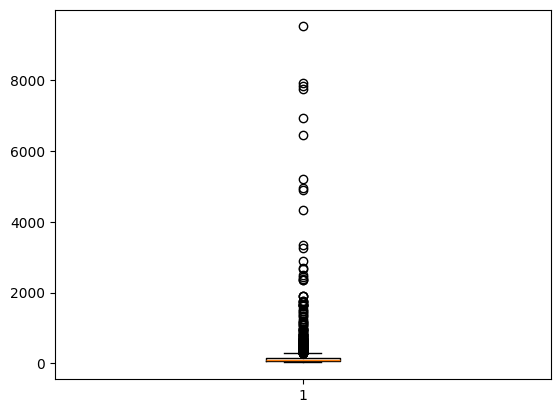

In [35]:
import matplotlib.pyplot as plt

#Some context for whether the above percentages are meaningful: On average, a given bit appears in 123 chemicals (mean)
# with a median of 60 chemicals. fp1188 appears in 119 chemicals total, with 79.8% of these being chemicals uncategorized 
# by either ARN or NCC

plt.boxplot(mp_fp_df.sum().values)
plt.show()

# Grouped Chemical Distributions

## Group summaries

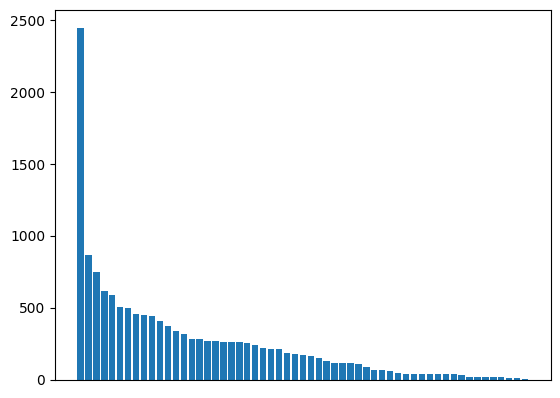

In [36]:
import matplotlib.pyplot as plt

#Bar chart of ARN category membership
series_of_interest = all_groups['predicted group 1'].value_counts()
plt.bar(series_of_interest.index, series_of_interest.values)
plt.xticks([])
index_str = ''
for i in series_of_interest.index:
    index_str += i
    index_str += '\n'
# plt.annotate(index_str, (57,1400))
plt.show()

In [37]:
pd.DataFrame(all_groups['predicted group 1'].value_counts())

,count
predicted group 1,
miscellaneous chemistry,2451
chlorinated aromatic hydrocarbons,868
Unsubstituted and linear aliphatic-substituted cyclic ketones,748
Simple Lithium compounds,618
Esters from linear saturated dicarboxylic acids and branched aliphatic alcohols,585
Alpha-chloro aliphatic carboxylate derivatives,504
Esters from branched or non-aromatic cyclic dicarboxylic acids and aliphatic alcohols,499
Cyclic ethers,454
aralkylamines,450


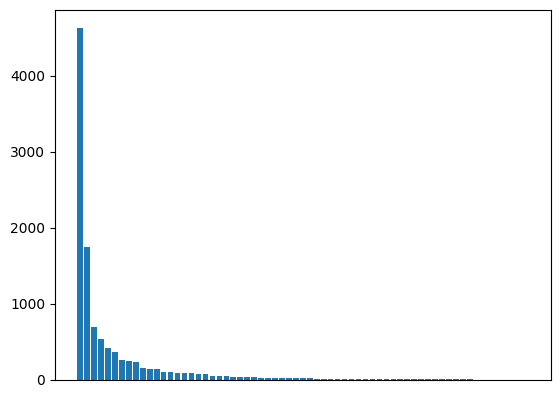

In [38]:
# Bar chart of NCC Category membership

ncc_df = pd.DataFrame({'category':epa_categories, 'count':[sum(all_groups[i]) for i in epa_categories]})
ncc_df = ncc_df.sort_values('count', ascending=False)
plt.bar(ncc_df['category'], ncc_df['count'])
plt.xticks([])
plt.show()

In [39]:
ncc_df

,category,count
20,Neutral Organics,4633
15,Esters (Acute toxicity),1750
26,Phenols (Acute toxicity),690
6,Anilines (Acute toxicity),535
3,Aldehydes (Acute toxicity),419
54,Esters (Chronic toxicity),361
41,Anionic Surfactants,262
2,Acrylates/Methacrylates (Acute toxicity),243
39,Alkoxysilanes,235
14,Epoxides,153


## Group overlaps

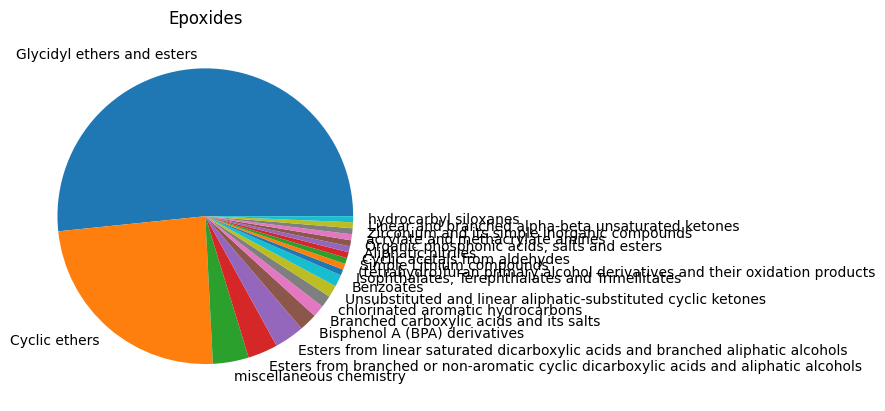

In [40]:
category = 'Epoxides'
category_chems = all_groups.loc[all_groups[category]==1]
arn_values = category_chems['predicted group 1'].value_counts()
plt.pie(arn_values.values, labels = arn_values.index)
plt.title(category)
plt.show()

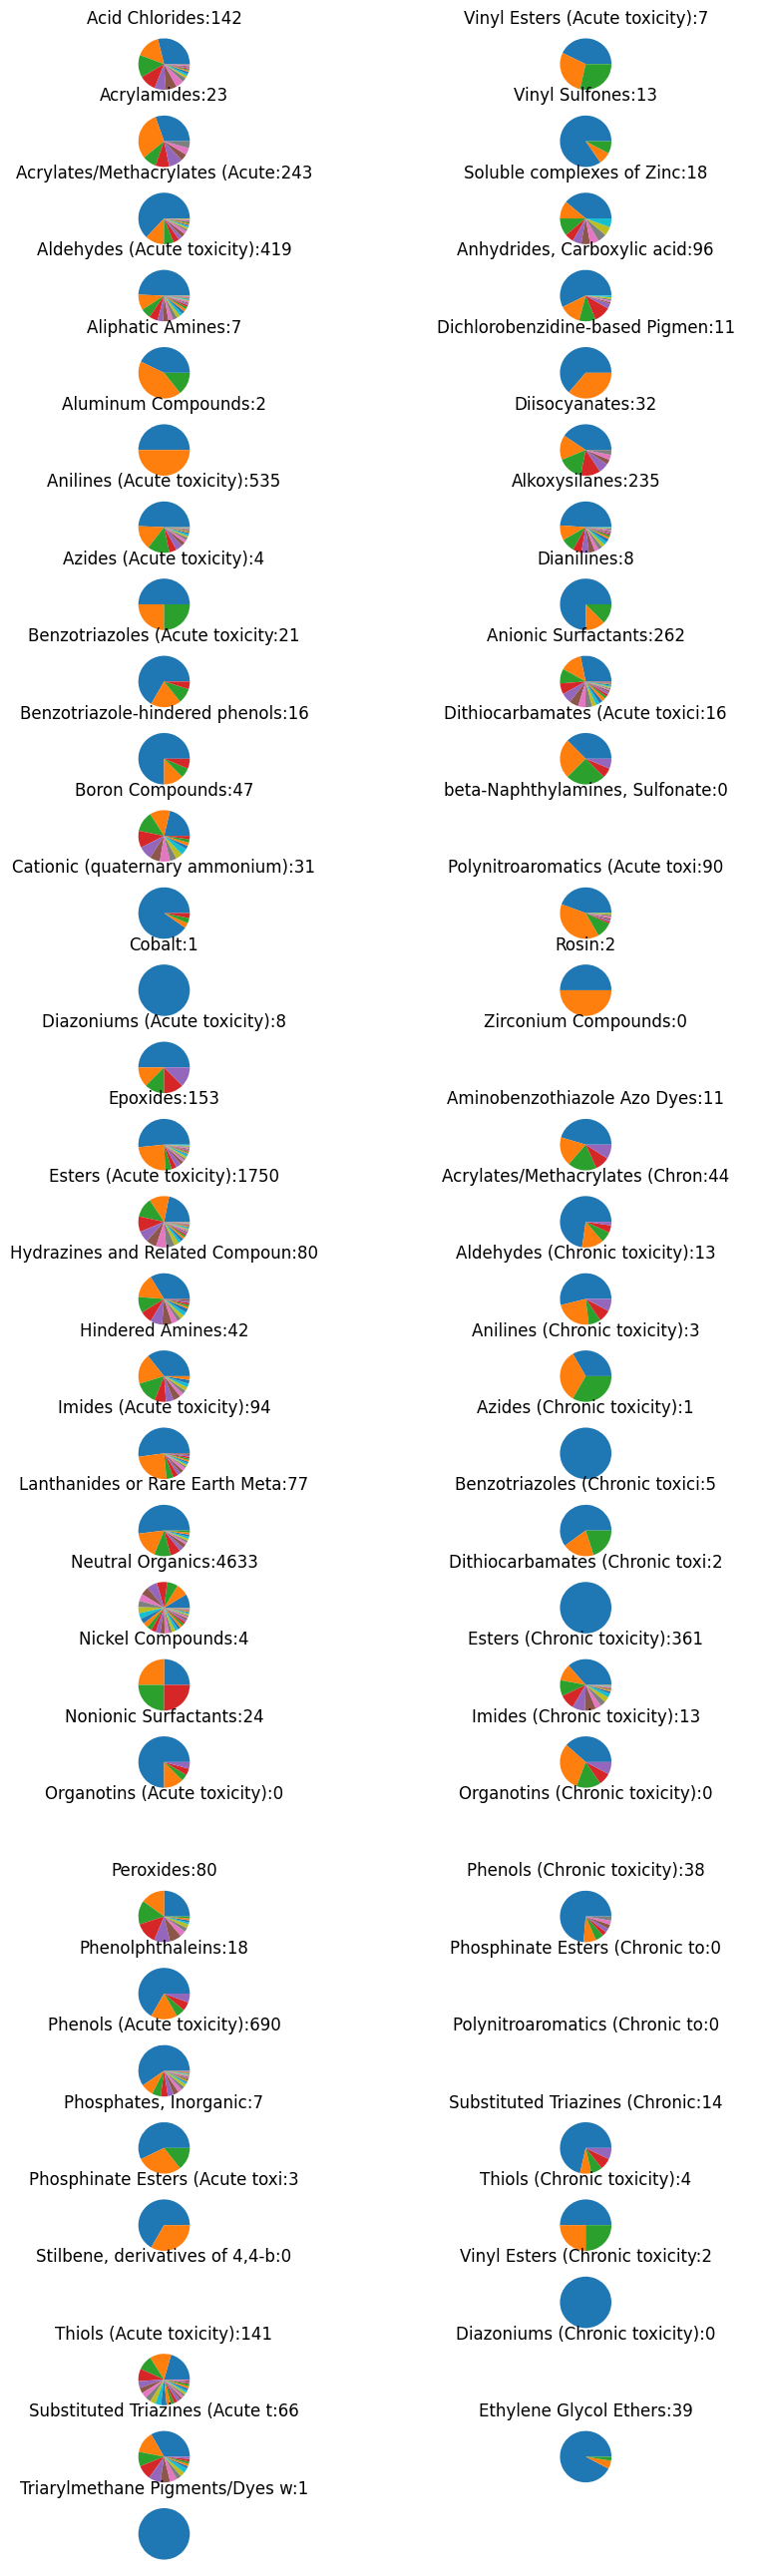

In [42]:
#Showing how NCC categories are composed in terms of ARN categories
fig, axs = plt.subplots(33,2)
for i in range(33):
    category = epa_categories[i]
    category_chems = all_groups.loc[all_groups[category]==1]
    arn_values = category_chems['predicted group 1'].value_counts()
    axs[i,0].pie(arn_values.values, labels = ['' for _ in arn_values.index])
    axs[i,0].set_title(category[:30] + f':{len(category_chems)}')

for j in range(32):
    i = j + 33
    category = epa_categories[i]
    category_chems = all_groups.loc[all_groups[category]==1]
    arn_values = category_chems['predicted group 1'].value_counts()
    axs[j,1].pie(arn_values.values, labels = ['' for _ in arn_values.index])
    axs[j,1].set_title(category[:30] + f':{len(category_chems)}')

axs[-1,-1].axis('off')
fig.set_figheight(33)
fig.set_figwidth(10)
plt.show()
# plt.savefig('../outputs/ncc_arn_composition_pies.png')


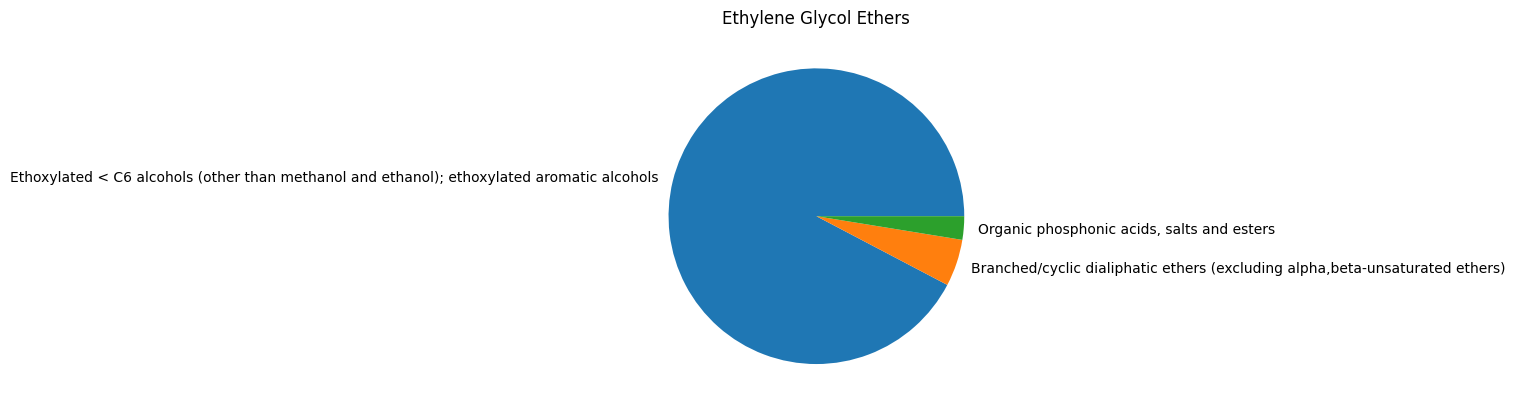

In [43]:
category = 'Ethylene Glycol Ethers'
category_chems = all_groups.loc[all_groups[category]==1]
arn_values = category_chems['predicted group 1'].value_counts()
plt.pie(arn_values.values, labels = arn_values.index)
plt.title(category)
plt.show()

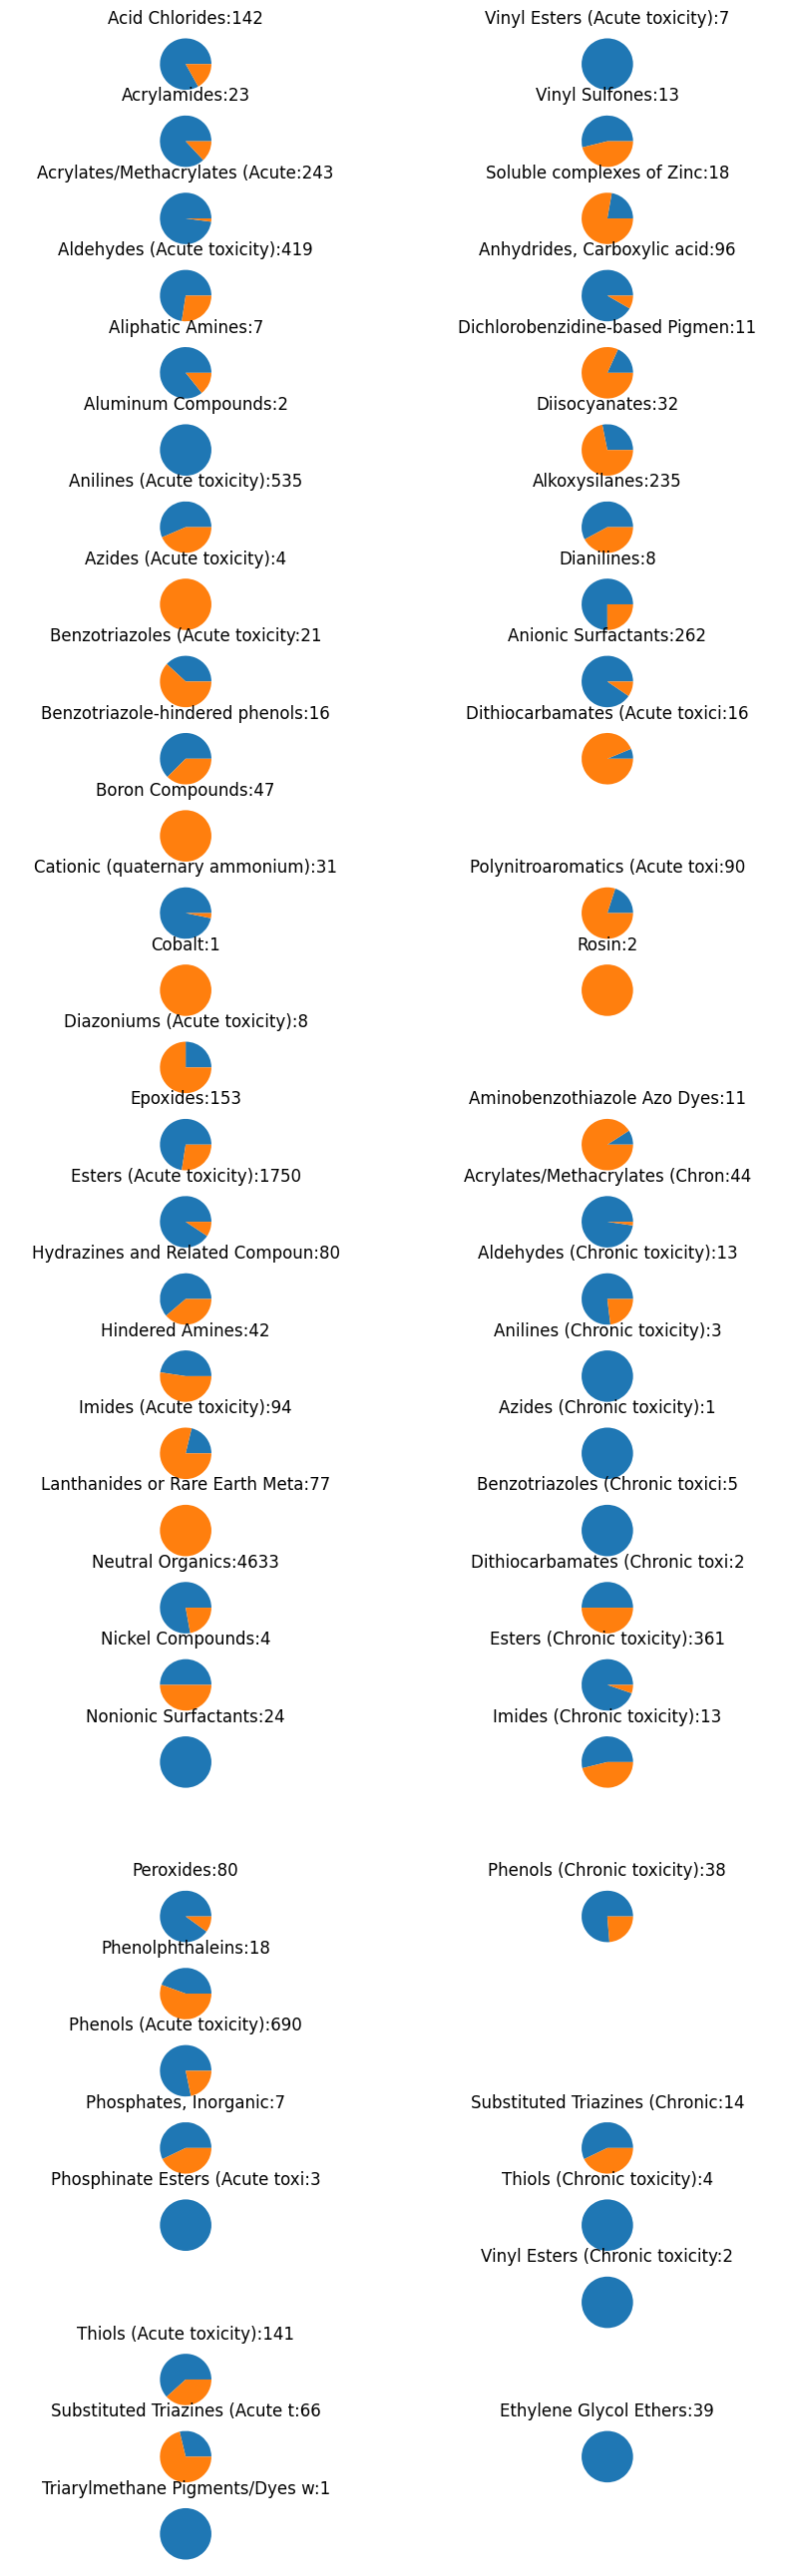

In [44]:
#Showing NCC categories in terms of how many of them are categorized at all by ARN

fig, axs = plt.subplots(33,2)
for i in range(33):
    category = epa_categories[i]
    category_chems = all_groups.loc[all_groups[category]==1]
    if len(category_chems)>0:
        trues = len(category_chems.loc[category_chems['in domain']==True])
        falses = len(category_chems) - trues
        axs[i,0].pie([trues, falses], labels = ['', ''])
        axs[i,0].set_title(category[:30] + f':{len(category_chems)}')
    else:
        axs[i,0].axis('off')

for j in range(32):
    i = j + 33
    category = epa_categories[i]
    category_chems = all_groups.loc[all_groups[category]==1]
    if len(category_chems)>0:
        trues = len(category_chems.loc[category_chems['in domain']==True])
        falses = len(category_chems) - trues
        axs[j,1].pie([trues, falses], labels = ['', ''])
        axs[j,1].set_title(category[:30] + f':{len(category_chems)}')
    else:
        axs[j,1].axis('off')

axs[-1,-1].axis('off')
fig.set_figheight(33)
fig.set_figwidth(10)
plt.show()
# plt.savefig('../outputs/ncc_in_arn_domain_pie.png')


In [45]:
in_domain_only

,dtxsid,CASRN,smiles,NCC,ClassyFire,group,predicted group 1,predicted group 2,predicted group 3,predicted group 1 probability,...,Phenols (Chronic toxicity),Phosphinate Esters (Chronic toxicity),Polynitroaromatics (Chronic toxicity),Substituted Triazines (Chronic toxicity),Thiols (Chronic toxicity),Vinyl Esters (Chronic toxicity),Diazoniums (Chronic toxicity),Ethylene Glycol Ethers,epa_list,NCC_EPA_match
0,DTXSID4063036,3452-09-3,CCCCCCCC#C,"('Neutral Organics',)",Acetylides,"('Acetylides', nan)",Aliphatic nitriles,"Organic phosphonic acids, salts and esters",Simple Lithium compounds,0.429444,...,0,0,0,0,0,0,0,0,['Neutral Organics'],True
1,DTXSID30870753,693-02-7,CCCCC#C,"('Neutral Organics',)",Acetylides,"('Acetylides', nan)",Aliphatic nitriles,Simple Lithium compounds,"Organic phosphonic acids, salts and esters",0.356111,...,0,0,0,0,0,0,0,0,['Neutral Organics'],True
2,DTXSID7062374,2396-65-8,C#CCCCCCC#C,"('Neutral Organics',)",Acetylides,"('Acetylides', nan)",Aliphatic nitriles,primary aliphatic diamines and their salts,Simple Lithium compounds,0.403889,...,0,0,0,0,0,0,0,0,['Neutral Organics'],True
3,DTXSID9061097,765-13-9,CCCCCCCCCCCCCC#C,"('Neutral Organics',)",Acetylides,"('Acetylides', nan)",Aliphatic nitriles,"Organic phosphonic acids, salts and esters",Simple Lithium compounds,0.429444,...,0,0,0,0,0,0,0,0,['Neutral Organics'],True
4,DTXSID1061233,871-84-1,C#CCCCCC#C,"('Neutral Organics',)",Acetylides,"('Acetylides', nan)",Aliphatic nitriles,Simple Lithium compounds,primary aliphatic diamines and their salts,0.400556,...,0,0,0,0,0,0,0,0,['Neutral Organics'],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14211,DTXSID1074961,40615-39-2,COC1=CC=C(C=C1)C(OC[C@H]1O[C@H](C[C@@H]1O)N1C=...,NaN,Triphenyl compounds,"('Triphenyl compounds', nan)",Phthalic anhydrides and hydrogenated phthalic ...,miscellaneous chemistry,aromatic ethers,0.145556,...,0,0,0,0,0,0,0,0,[],True
14212,DTXSID30887447,68517-02-2,CCC(C1=CC=C(OCC2CO2)C=C1)(C1=CC=C(OCC2CO2)C=C1...,"('Epoxides',)",Triphenyl compounds,"('Triphenyl compounds', nan)",Glycidyl ethers and esters,Bisphenol A (BPA) derivatives,miscellaneous chemistry,0.526111,...,0,0,0,0,0,0,0,0,['Epoxides'],True
14214,DTXSID70889405,106253-69-4,CC1=C(C=CC=C1N1CC(COC2=CC=C(C=C2)C(C2=CC=C(OCC...,NaN,Triphenyl compounds,"('Triphenyl compounds', nan)",Glycidyl ethers and esters,miscellaneous chemistry,Bisphenol A (BPA) derivatives,0.551667,...,0,0,0,0,0,0,0,0,[],True
14216,DTXSID3073052,110726-28-8,CC(C)(C1=CC=C(O)C=C1)C1=CC=C(C=C1)C(C)(C1=CC=C...,"('Phenols (Acute toxicity)',)",Triphenyl compounds,"('Triphenyl compounds', nan)",Miscellaneous bisphenols,Bisphenol A (BPA) derivatives,miscellaneous chemistry,0.398778,...,0,0,0,0,0,0,0,0,['Phenols (Acute toxicity)'],True


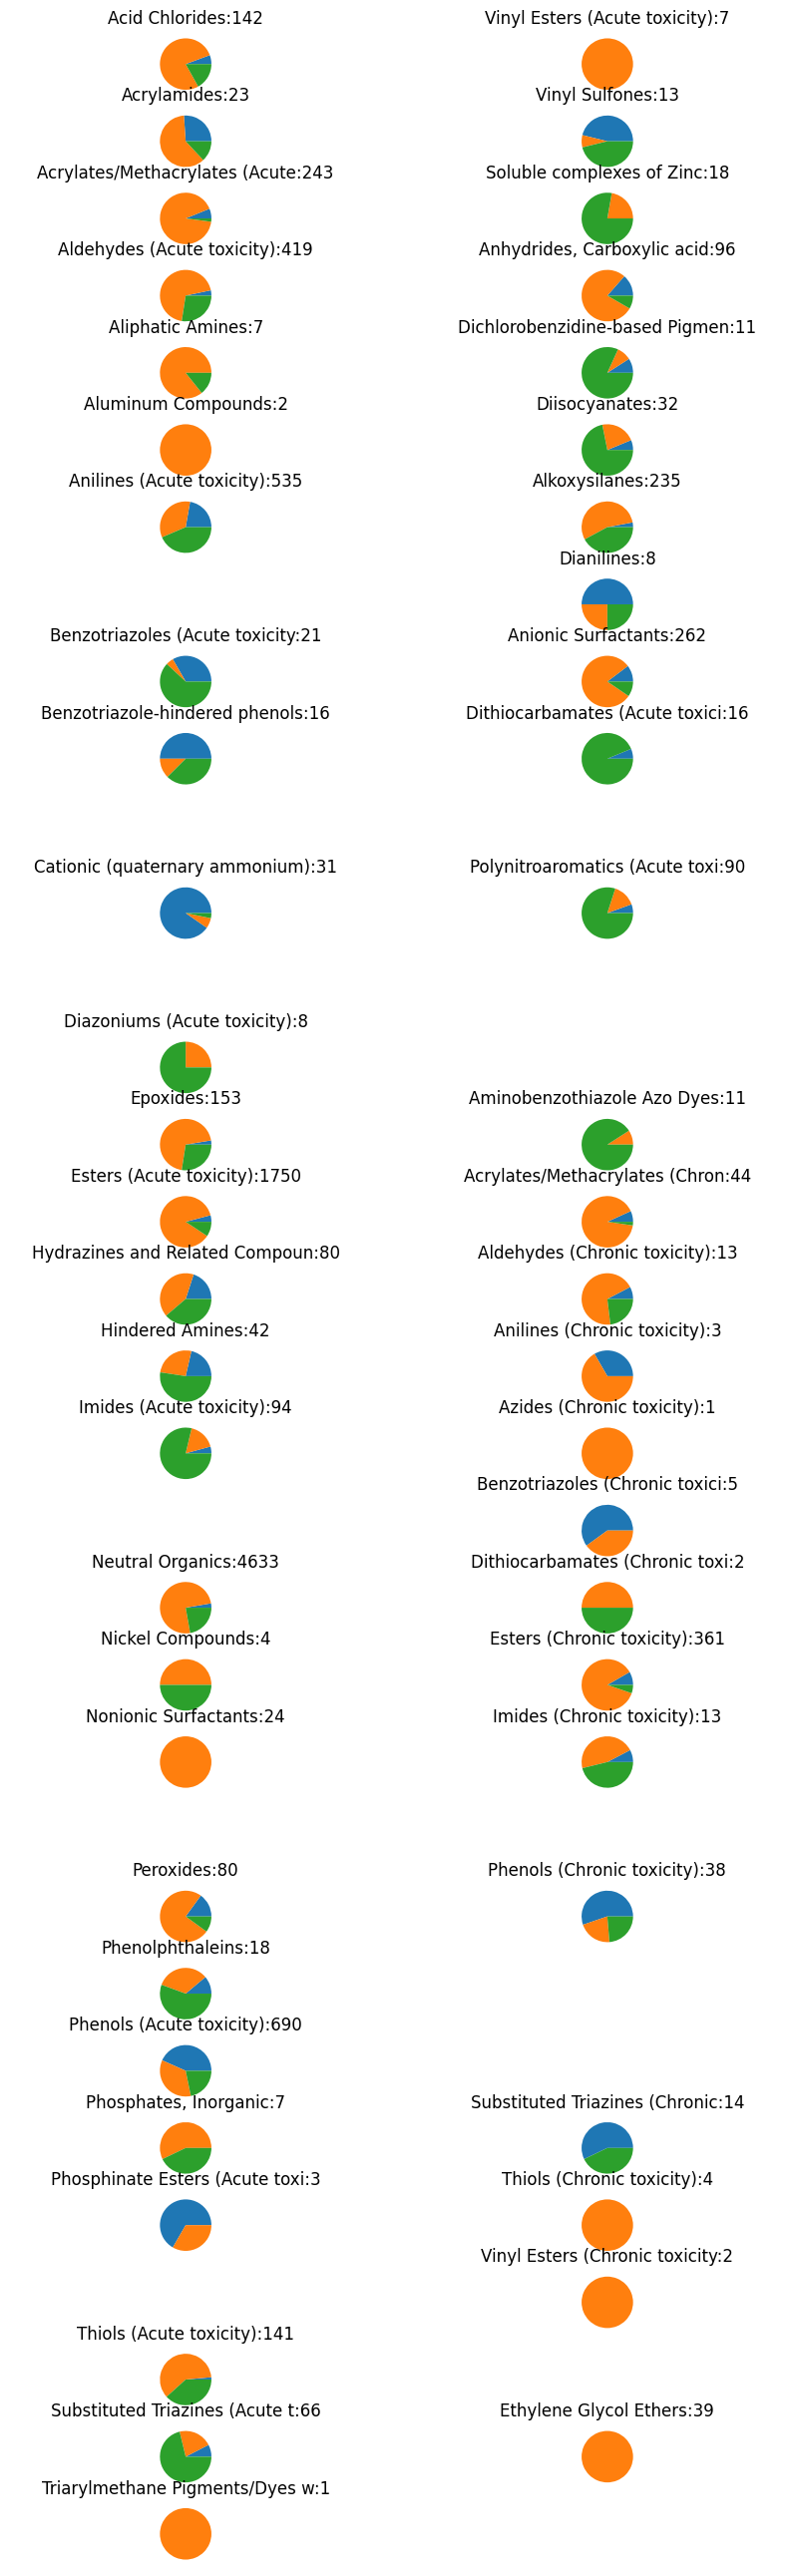

In [46]:
#Showing NCC categories in terms of how many are sorted into miscellaneous chemistry
labels = ['miscellaneous chemistry', 'other', 'out of domain']

fig, axs = plt.subplots(33,2)
for i in range(33):
    category = epa_categories[i]
    red_category_chems = in_domain_only.loc[in_domain_only[category]==1]
    category_chems = all_groups.loc[all_groups[category]==1]
    if len(red_category_chems)>0:
        trues = len(red_category_chems.loc[red_category_chems['predicted group 1']=='miscellaneous chemistry'])
        falses = len(red_category_chems) - trues
        outs = len(category_chems)-len(red_category_chems)
        axs[i,0].pie([trues,falses, outs], labels = None)
        axs[i,0].set_title(category[:30] + f':{len(category_chems)}')
    else:
        axs[i,0].axis('off')

for j in range(32):
    i = j + 33
    category = epa_categories[i]
    red_category_chems = in_domain_only.loc[in_domain_only[category]==1]
    category_chems = all_groups.loc[all_groups[category]==1]
    if len(red_category_chems)>0:
        trues = len(red_category_chems.loc[red_category_chems['predicted group 1']=='miscellaneous chemistry'])
        falses = len(red_category_chems) - trues
        outs = len(category_chems) - len(red_category_chems)
        axs[j,1].pie([trues, falses, outs], labels = None)
        axs[j,1].set_title(category[:30] + f':{len(category_chems)}')
    else:
        axs[j,1].axis('off')

axs[-1,-1].axis('off')
fig.set_figheight(33)
fig.set_figwidth(10)
plt.show()
# plt.savefig('../outputs/ncc_miscellaneous_chemistry_pie.png')


In [47]:
category = arn_categories[12]
category_chems = all_groups.loc[all_groups['predicted group 1'] == category]
total = len(category_chems)
compositions = {'ncc_cat':[], 'count':[]}
for j in epa_categories:
    count = sum(category_chems[j])
    if count > 0:
        compositions['ncc_cat'].append(j)
        compositions['count'].append(count/total)

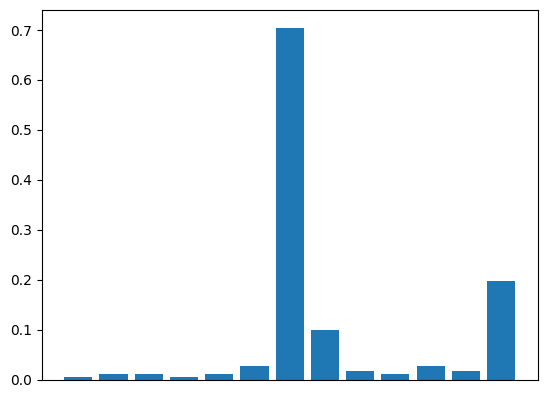

In [48]:
plt.bar(compositions['ncc_cat'], compositions['count'])
plt.xticks([])
plt.show()

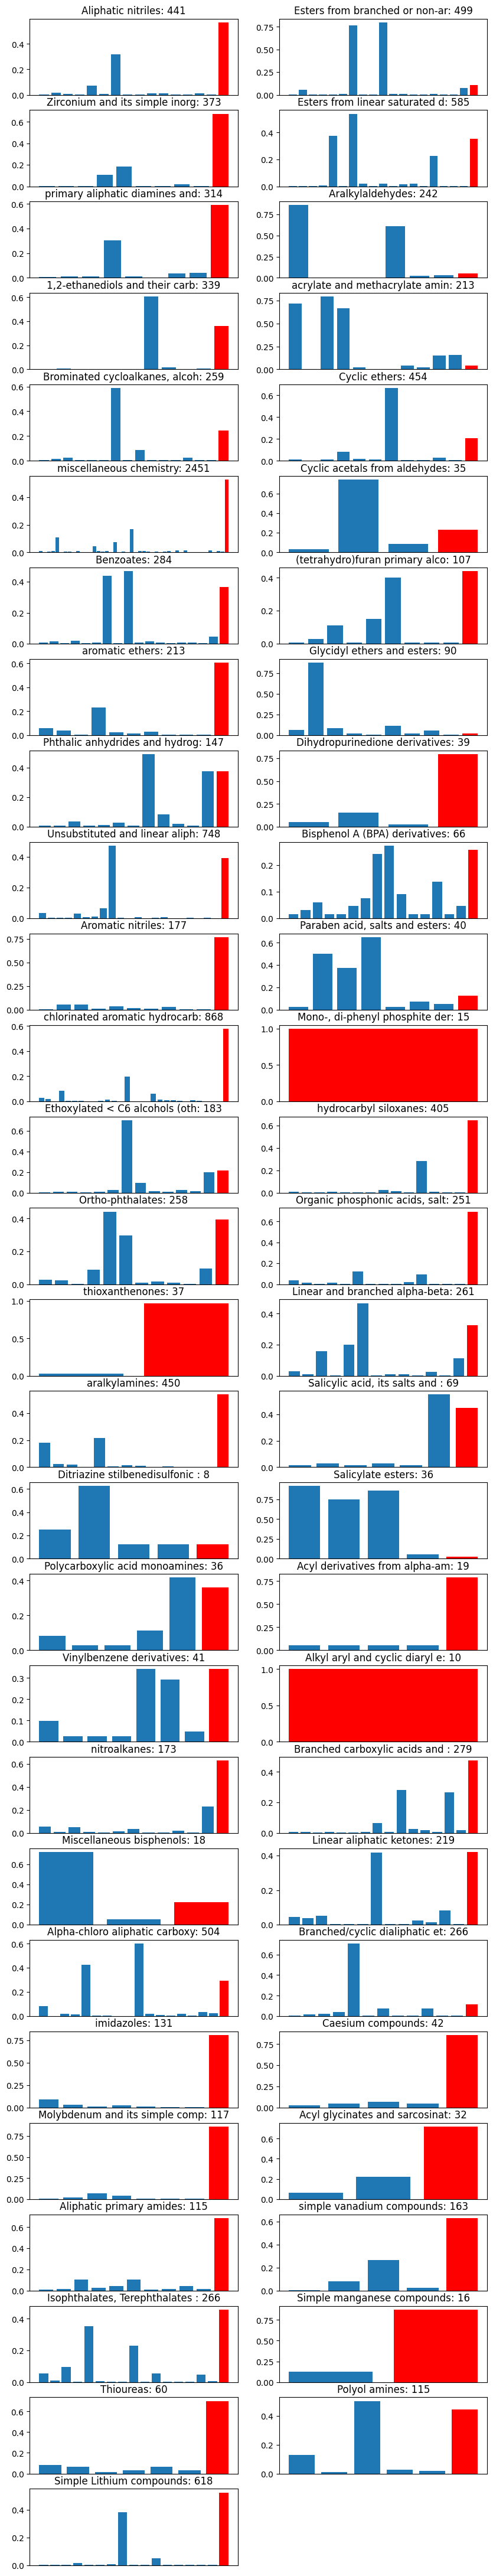

In [49]:
#Repeating this process, but to view ARN category compositions in terms of NCC categories
fig, axs = plt.subplots(28,2)

#Iterate through ARN categories to create graphs
for i in range(28):
    category = arn_categories[i]
    category_chems = all_groups.loc[all_groups['predicted group 1'] == category]
    total = len(category_chems)
    compositions = {'ncc_cat':[], 'count':[]}
    for j in epa_categories:
        count = sum(category_chems[j])
        if count > 0:
            compositions['ncc_cat'].append(j)
            compositions['count'].append(count/total)

    # Add in a bar for uncategorized chemicals, this will always be the last bar in the chart
    compositions['ncc_cat'].append('uncategorized')
    uncat_by_ncc = len(category_chems.loc[category_chems['epa_list']=='[]'])
    compositions['count'].append(uncat_by_ncc/total)

    #Produce the graphs
    axs[i,0].bar(compositions['ncc_cat'], compositions['count'])
    axs[i,0].bar(compositions['ncc_cat'], [0 for _ in compositions['count'][:-1]]+[uncat_by_ncc/total], color = 'red')    
    axs[i,0].set_title(category[:30] + f': {total}')
    axs[i,0].set_xticks([])

# Iterate through the rest of the categories for the second column of graphs
for i in range(27):
    j = i + 28
    category = arn_categories[j]
    category_chems = all_groups.loc[all_groups['predicted group 1'] == category]
    total = len(category_chems)
    compositions = {'ncc_cat':[], 'count':[]}
    for k in epa_categories:
        count = sum(category_chems[k])
        if count > 0:
            compositions['ncc_cat'].append(k)
            compositions['count'].append(count/total)

    # Add in a bar for uncategorized chemicals, this will always be the last bar in the chart
    compositions['ncc_cat'].append('uncategorized')
    uncat_by_ncc = len(category_chems.loc[category_chems['epa_list']=='[]'])
    compositions['count'].append(uncat_by_ncc/total)

    #Produce the graphs
    axs[i,1].bar(compositions['ncc_cat'], compositions['count'])
    #Red will represent data uncategorized by NCC
    axs[i,1].bar(compositions['ncc_cat'], [0 for _ in compositions['count'][:-1]]+[uncat_by_ncc/total], color = 'red')
    axs[i,1].set_title(category[:30] + f': {total}')
    axs[i,1].set_xticks([])

# Knock off the invisible last graph and set up figure size
axs[-1,-1].axis('off')
fig.set_figheight(56)
fig.set_figwidth(10)

plt.show()
    

In [50]:
indexer = []
for i in range(len(all_groups)):
    x = all_groups['epa_list'][i]!='[]'
    y = all_groups['in domain'][i]==True
    if x or y:
        indexer.append(True)
    else:
        indexer.append(False)

len(all_groups.loc[indexer])

11576

In [51]:
len(all_groups) - 11576

2642

In [74]:
# Percentage of each ARN category that is not categorized by NCC
arn_without_ncc_df = {'arn_category':[], 'percent_no_ncc':[], 'total':[]}
for category in in_domain_only['predicted group 1'].unique():
    set_in_domain = in_domain_only.loc[in_domain_only['predicted group 1']==category]
    uncat_by_ncc = len(set_in_domain.loc[set_in_domain['epa_list']=='[]'])/len(set_in_domain)
    arn_without_ncc_df['arn_category'].append(category)
    arn_without_ncc_df['percent_no_ncc'].append(round(100*uncat_by_ncc,2))
    arn_without_ncc_df['total'].append(len(set_in_domain))
arn_without_ncc_df = pd.DataFrame(arn_without_ncc_df).sort_values('percent_no_ncc',ascending=False).reset_index(drop = True)
arn_without_ncc_df

,arn_category,percent_no_ncc,total
0,Alkyl aryl and cyclic diaryl esters of phospho...,100.00,10
1,Molybdenum and its simple compounds,100.00,12
2,"Mono-, di-phenyl phosphite derivatives",100.00,15
3,thioxanthenones,95.45,22
4,Dialkyl (and diaryl) dithiophosphates (DDP),94.12,17
5,Dihydropurinedione derivatives,93.75,16
6,imidazoles,89.06,64
7,simple vanadium compounds,84.62,13
8,Acyl derivatives from alpha-amino acids other ...,78.95,19
9,Aromatic nitriles,78.83,137


In [81]:
# Check how many newly categorized chemicals we would get if we set the cutoff value at a certain percent uncategorized
cutoff = 50
reduced_set = arn_without_ncc_df.loc[arn_without_ncc_df['percent_no_ncc'] >= cutoff]
(reduced_set.iloc[:,1]*reduced_set.iloc[:,2]/100).sum()

np.float64(1739.9926999999998)

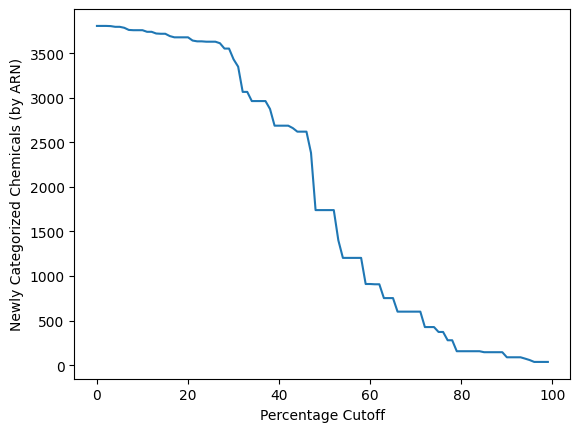

In [83]:
# Plot this as a graph
x = []
y = []
for i in range(100):
    cutoff = i
    reduced_set = arn_without_ncc_df.loc[arn_without_ncc_df['percent_no_ncc'] >= cutoff]
    output = (reduced_set.iloc[:,1]*reduced_set.iloc[:,2]/100).sum()
    x.append(i)
    y.append(output)

plt.plot(x, y)
plt.xlabel('Percentage Cutoff')
plt.ylabel('Newly Categorized Chemicals (by ARN)')
plt.show()

# Which ARN categories only show up in NCC-covered chems vs. add novel information?

In [52]:
uncat_by_ncc = all_groups.loc[all_groups['epa_list'] =='[]'].loc[all_groups['in domain'] == True]
cat_by_ncc = all_groups.loc[all_groups['epa_list'] !='[]'].loc[all_groups['in domain'] == True]

arn_for_uncat = uncat_by_ncc['predicted group 1'].unique()
arn_for_cat = cat_by_ncc['predicted group 1'].unique()

only_uncat = set(arn_for_uncat) - set(arn_for_cat)
only_uncat

{'Alkyl aryl and cyclic diaryl esters of phosphoric acid',
 'Molybdenum and its simple compounds',
 'Mono-, di-phenyl phosphite derivatives'}

In [53]:
set(arn_for_cat) - set(arn_for_uncat)

{'Salicylate esters'}

In [54]:
for group in only_uncat:
    print(f"{group}: {len(all_groups.loc[all_groups['in domain'] == True].loc[all_groups['predicted group 1']== group])}")

Mono-, di-phenyl phosphite derivatives: 15
Molybdenum and its simple compounds: 12
Alkyl aryl and cyclic diaryl esters of phosphoric acid: 10


In [55]:
group = 'Salicylate esters'
print(f"{group}: {len(all_groups.loc[all_groups['in domain'] == True].loc[all_groups['predicted group 1']== group])}")

Salicylate esters: 35


In [56]:
all_groups.loc[all_groups['in domain']==True].loc[all_groups['predicted group 1'] == 'Salicylate esters'][['Esters (Chronic toxicity)', 'Esters (Acute toxicity)', 'Neutral Organics', 'Phenols (Acute toxicity)', 'Phenols (Chronic toxicity)']]

,Esters (Chronic toxicity),Esters (Acute toxicity),Neutral Organics,Phenols (Acute toxicity),Phenols (Chronic toxicity)
1119,0,1,1,1,0
1298,0,1,1,1,0
1606,0,1,1,1,0
1609,0,1,0,0,0
1618,0,1,1,1,0
1622,0,1,1,1,0
1645,0,1,1,1,0
1659,0,1,1,1,0
1667,0,1,1,1,0
1688,0,1,1,1,0


Note: the Salicylate esters are all already categorized by NCC. They are all sorted into one of the Esters and Phenols groups, sometimes also with Neutral Organics. 

In [57]:
from ncc_categories.cats import printTree

[11:48:28] SMARTS Parse Error: syntax error while parsing: [#7](=[#8])$[[#1],[#6X4]]{1..;xm}
[11:48:28] SMARTS Parse Error: Failed parsing SMARTS '[#7](=[#8])$[[#1],[#6X4]]{1..;xm}' for input: '[#7](=[#8])$[[#1],[#6X4]]{1..;xm}'
[11:48:28] SMARTS Parse Error: syntax error while parsing: $[[#1],[#6X4]]{1..;xm}[#7+][#8-]
[11:48:28] SMARTS Parse Error: Failed parsing SMARTS '$[[#1],[#6X4]]{1..;xm}[#7+][#8-]' for input: '$[[#1],[#6X4]]{1..;xm}[#7+][#8-]'
[11:48:28] SMARTS Parse Error: syntax error while parsing: c1ccccc1.$[[#1],$[[#6X4]]{1..}]{1..;x}
[11:48:28] SMARTS Parse Error: Failed parsing SMARTS 'c1ccccc1.$[[#1],$[[#6X4]]{1..}]{1..;x}' for input: 'c1ccccc1.$[[#1],$[[#6X4]]{1..}]{1..;x}'
[11:48:28] SMARTS Parse Error: syntax error while parsing: $[$[[#6X4]]{1..}]{1..;x}[Cl,Br,#8h]
[11:48:28] SMARTS Parse Error: Failed parsing SMARTS '$[$[[#6X4]]{1..}]{1..;x}[Cl,Br,#8h]' for input: '$[$[[#6X4]]{1..}]{1..;x}[Cl,Br,#8h]'
[11:48:28] SMARTS Parse Error: syntax error while parsing: [#8]{>-

# Internal NCC exploration: Are there redundant/subcategories?

In [93]:
for category in epa_categories:
    category_members = all_groups.loc[all_groups[category] == 1]
    if len(category_members) > 0:
        for possible_parent in epa_categories:
            if possible_parent == category:
                pass
            else:
                parent_cat_members = category_members.loc[category_members[possible_parent] == 1]
                if len(parent_cat_members) == len(category_members):
                    print(f"Check {category} and {possible_parent} for potential subcategory relationship. ({len(category_members)})")

Check Triarylmethane Pigments/Dyes with Non-solubilizing Groups and Phenols (Acute toxicity) for potential subcategory relationship. (1)
Check Vinyl Esters (Acute toxicity) and Esters (Acute toxicity) for potential subcategory relationship. (7)
Check Vinyl Esters (Acute toxicity) and Neutral Organics for potential subcategory relationship. (7)
Check Dianilines and Anilines (Acute toxicity) for potential subcategory relationship. (8)
Check Acrylates/Methacrylates (Chronic toxicity) and Esters (Chronic toxicity) for potential subcategory relationship. (44)
Check Vinyl Esters (Chronic toxicity) and Neutral Organics for potential subcategory relationship. (2)
Check Vinyl Esters (Chronic toxicity) and Esters (Chronic toxicity) for potential subcategory relationship. (2)
Check Ethylene Glycol Ethers and Neutral Organics for potential subcategory relationship. (39)


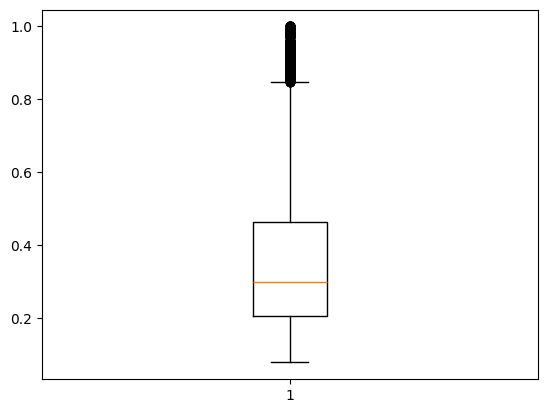

0.3011111111111111


In [103]:
plt.boxplot(all_groups.loc[all_groups['in domain']==True]['predicted group 1 probability'])
plt.show()
print(np.quantile(all_groups.loc[all_groups['in domain']==True]['predicted group 1 probability'].values, q = 0.5))

In [104]:
len(all_groups.loc[all_groups['in domain'] == True].loc[all_groups['predicted group 1 probability']>= 0.3011111111111111].loc[all_groups['epa_list']=='[]'])

2015

In [ ]:
#This is a counter of all the truly sorted chemicals in the data set.
counter = 0
for _,x in all_groups.iterrows():
    if x['epa_list'] != '[]' or (x['in domain'] == True and x['predicted group 1'] != 'miscellaneous chemistry'):
        counter += 1
counter

10934

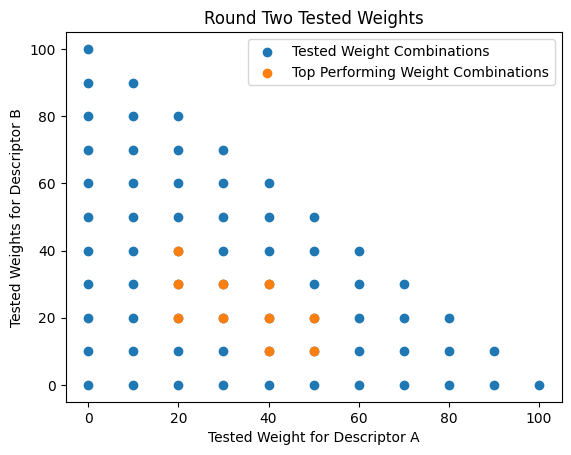

In [121]:
from numpy import arange

x = []
y = []
for a in arange(0,101, 10):
    for b in arange(0, 101, 10):
        for c in arange(0, 101, 10):
            if a+b+c == 100:
                x.append(a)
                y.append(b)
plt.scatter(x, y, label = 'Tested Weight Combinations')
plt.xlabel('Tested Weight for Descriptor A')
plt.ylabel('Tested Weights for Descriptor B')
plt.title('Round Two Tested Weights')
plt.scatter([20, 20, 20, 30, 30, 40, 40, 40, 50, 50], [20, 30, 40, 20, 30, 10, 20, 30, 10, 20 ], label = 'Top Performing Weight Combinations')
plt.legend()
plt.show()

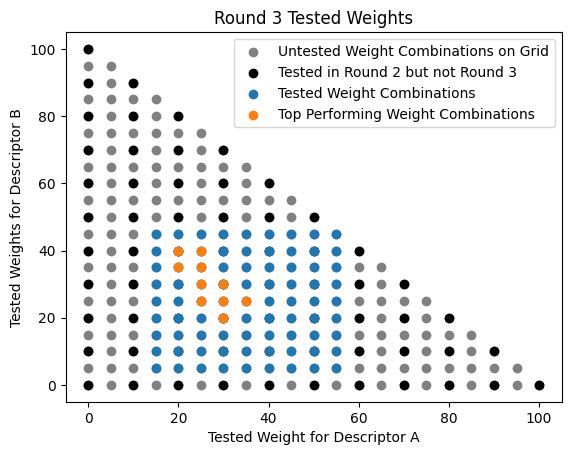

In [133]:
from numpy import arange

x0 = []
y0 = []
for a in arange(0,101, 5):
    for b in arange(0, 101, 5):
        for c in arange(0, 101, 5):
            if a+b+c == 100:
                x0.append(a)
                y0.append(b)

x1 = []
y1 = []
for a in arange(0,101, 10):
    for b in arange(0, 101, 10):
        for c in arange(0, 101, 10):
            if a+b+c == 100:
                x1.append(a)
                y1.append(b)

x = []
y = []
for a in arange(15,56, 5):
    for b in arange(5, 46, 5):
        for c in arange(0, 101, 5):
            if a+b+c == 100:
                x.append(a)
                y.append(b)
plt.scatter(x0, y0, c = 'gray', label = 'Untested Weight Combinations on Grid')
plt.scatter(x1, y1, c = 'black', label = 'Tested in Round 2 but not Round 3')
plt.scatter(x, y, label = 'Tested Weight Combinations')
plt.xlabel('Tested Weight for Descriptor A')
plt.ylabel('Tested Weights for Descriptor B')
plt.title('Round 3 Tested Weights')
plt.scatter([25,25,25,20,20,30,30, 30,35,25], [35,30,40,35,40,20,25,30,25,25], label = 'Top Performing Weight Combinations')
plt.legend()
plt.show()